In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris.csv')
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Initial Distribution
---

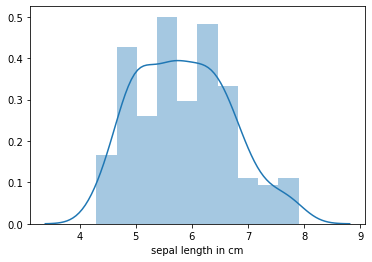

In [3]:
sns.distplot(data['sepal length in cm'],kde=True,bins=10)
plt.show()

## Equal Width Binning
---
Discretizes the feature by spliting its domain to a fixed number of equal-width intervals. <br>
The span of original domain is computed from the training data and is defined by the smallest and the largest feature value.

In [0]:
_,bins = pd.cut(data['sepal length in cm'], bins=3, retbins=True)
print(bins)

In [4]:
frequencies, bins, _ = plt.hist(data['sepal length in cm'], bins, rwidth=0.5)
print(frequencies)

NameError: name 'bins' is not defined

## Equal Frequency Binning
---
Discretization intervals contain approximately equal number of training data instances.

In [0]:
_, Bins = pd.qcut(data['sepal length in cm'], q=3, retbins=True)
print(Bins)

In [0]:
frequencies, Bins, _ = plt.hist(data['sepal length in cm'], Bins, rwidth = 0.5)
print(frequencies)